<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [20]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [21]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [22]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [23]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1: Become familiar with the dataset

In [24]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [25]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Task 2: Generate Descriptive Statistics and Visualizations

2.1- For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

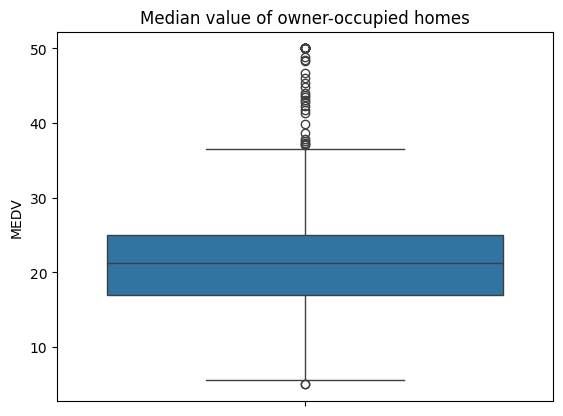

In [26]:
ax1 = sns.boxplot(data=boston_df, y='MEDV')
ax1.set_title('Median value of owner-occupied homes')

**Explanation**
The boxplot above shows the median value of the variable MEDV. It tells us: the median value of owner-occupied homes is around $21,000.

2.2- Provide a bar plot for the Charles river variable

[Text(0, 10, '22.09'), Text(0, 10, '28.44')]

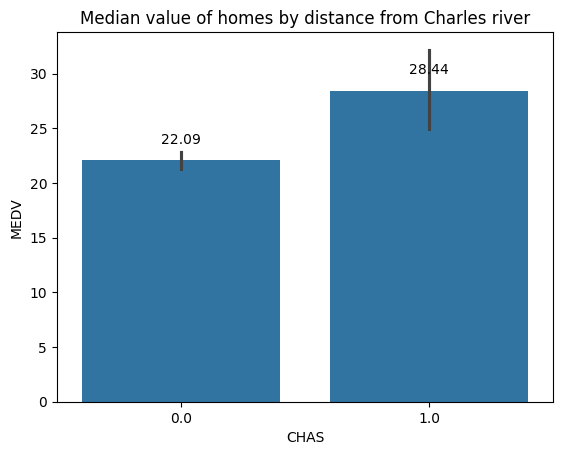

In [27]:
ax2 = sns.barplot(data=boston_df, x='CHAS', y='MEDV')
ax2.set_title('Median value of homes by distance from Charles river')
ax2.bar_label(ax2.containers[0], fmt='%.2f', padding=10)

**Explanation**
The barplot above shows the median value of owner-occupied homes by distance from the Charles river. It tells us: the median value of houses that border the river is higher than that of houses that do not border the river.

2.3- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median value of homes by the age')

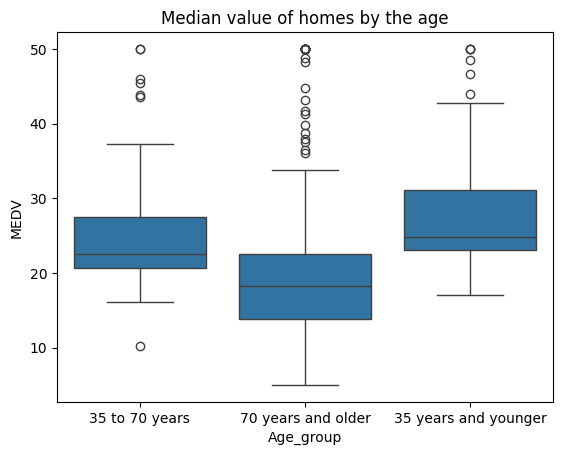

In [28]:
# discretize age into three groups
boston_df.loc[(boston_df['AGE']<=35, 'Age_group')] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'Age_group'] = '35 to 70 years'
boston_df.loc[(boston_df['AGE']>=70, 'Age_group')] = '70 years and older'

# create the boxplot for MEDV by the AGE variable
ax3 = sns.boxplot(data=boston_df, x='Age_group', y='MEDV')
ax3.set_title('Median value of homes by the age')

**Explanation**
The boxplot above shows the median value of owner-occupied homes by the age. It tells us: older people's homes are cheaper than younger people's homes.

2.4- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'The relationship between NOX and INDUS')

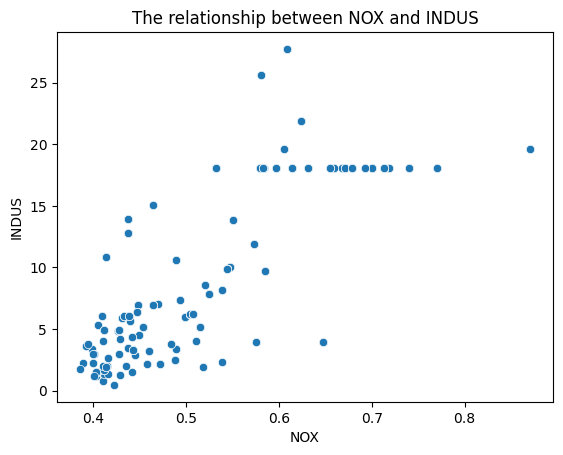

In [29]:
ax4 = sns.scatterplot(data=boston_df,  x='NOX', y='INDUS')
ax4.set_title('The relationship between NOX and INDUS')

**Explanation**
The values in the lower left portion of the scatter plot show that: the higher the proportion of non-retail business acres per town, the higher the corresponding nitric oxide concentration, and vice versa.

2.5- Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'The pupil to teacher ratio by town')

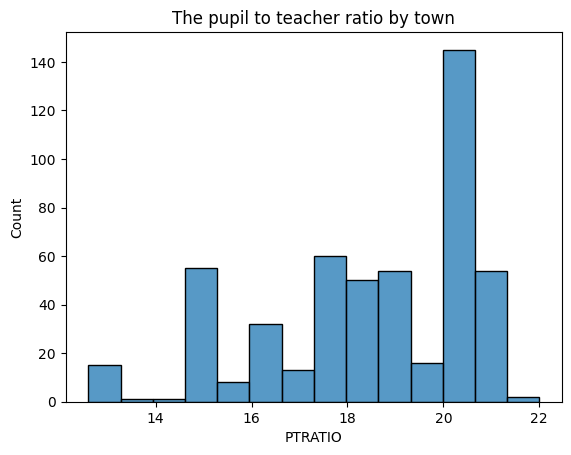

In [30]:
ax5 = sns.histplot(data = boston_df, x='PTRATIO')
ax5.set_title('The pupil to teacher ratio by town')

**Explanation**
The histogram above shows that most pupil-teacher ratios are around 20.

#### Task 3: Use the appropriate tests to answer the questions provided.

3.1- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypothesis:**
- Null Hypothesis: There's no significant difference in median value between houses bounded and not bounded by the Charles river.
- Alternative Hypothesis: There is significant difference in median value between houses bounded and not bounded by the Charles river.

**Perform a T-test**

In [31]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                   boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion**

Since the p-value is less than 0.05 we reject the Null Hypothesis. We can conclude: there is significant difference in median value between houses bounded and not bounded by the Charles river.

3.2- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis:**
- Null Hypothesis: There's no difference in Median values of houses for each proportion of owner occpied units built prior to 1940.
- Alternative Hypothesis: There is difference in Median values of houses for each proportion of owner occpied units built prior to 1940.

**Perform one-way ANOVA**

In [32]:
scipy.stats.f_oneway(boston_df[boston_df['Age_group'] == '35 years and younger']['MEDV'], 
                    boston_df[boston_df['Age_group'] == '35 to 70 years']['MEDV'], 
                    boston_df[boston_df['Age_group'] == '70 years and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion**

Since the p-value is less than 0.05 we reject the Null Hypothesis. We can conclude: there is a difference in the Median Housing Value for each proportion of owner-occupied units built before 1940.

3.3- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis:**
- Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
- Alternative Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

**Perform a Pearson Correlation test**

In [33]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion**

Since the Pearson Coefficient is 0.76365 and p-value less than 0.05 we reject the Null Hypothesis. We can conclude: there is a positive correlation between between Nitric oxide concentrations and proportion of non-retail business acres per town.

3.4- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis:**
- Null Hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
- Alternative Hypothesis: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

**Perform a Regression analysis**

In [34]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        16:29:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**

Since the p-value equal to 0, we reject the null hypothesis. We can conclude: there is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.